In [38]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pylab as plt
from plotnine import *
import plotnine as p9
import os
#0th row NMF
#1st row SNP-LDA
#2nd row NMF SNP
#3rd row prior SNP-LDA
#4th row prior NMF-SNP
rel_error=pd.DataFrame(columns=['Mode','Type','Dataset','relativeError','std']);
def add(error_list,std,Mode,Dataset):
    list=[];
    
    for i in range(0,1):
        list=[]
        list.append(Mode);
        if i==0:
            list.append('all')
        elif i==1:
            list.append('ref')
        else:
            list.append('denovo')
        list.append(Dataset)
        list.append(error_list)
        list.append(std)
        rel_error.loc[len(rel_error)] = list
#strain_num=[2,3,7];
strain_num=[7];
        
for j in strain_num:
    error_list1=[];
    error_list2=[];
    for i in range(0,10):
        unpickleFile1 = open('../simulation/simulation3/artsim_errorbar5/rel_error'+str(j)+'_'+str(i)+'.pkl', 'rb')
        error=pickle.load(unpickleFile1)[0]
        error_list1.append(error[0])
        if(j==7 or j==9):
            error_list2.append(error[4])
    if(j==2):
        add(np.mean(error_list1),np.std(error_list1),'Demixer (7 reference)','AS_1')
    if(j==3):
        add(np.mean(error_list1),np.std(error_list1),'Demixer (7 reference)','AS_2')
    if(j==7):
        add(np.mean(error_list1),np.std(error_list1),'Demixer (7 reference)','2 mixed')
        add(np.mean(error_list2),np.std(error_list2),'Demixer (7 reference)','3 mixed')
    if(j==9):
        add(np.mean(error_list1),np.std(error_list1),'Demixer (7 reference)','2 mixed')
        add(np.mean(error_list2),np.std(error_list2),'Demixer (7 reference)','3 mixed')

print(rel_error)

                    Mode Type  Dataset  relativeError       std
0  Demixer (7 reference)  all  2 mixed       0.005848  0.000328
1  Demixer (7 reference)  all  3 mixed       0.005836  0.000862


In [39]:
def rela_error(x,y):
            x=x;
            y=y;
            
            z=abs(((x-y))/(x+0.01));
            #print(z)
            #print(np.mean(z))
            return np.mean(z);
#strain_num=[2, 3,7,7];
#mix_list=[2,3,2,3]
strain_num=[7,7];
mix_list=[2,3]
method=['strain_QuanttB.csv','strain_Splitstrain.csv']
method=['strain_QuanttB.csv']
for method_name in method:
    for no_strain in strain_num:
        for mix in mix_list:
            if(method_name=='strain_Splitstrain.csv' and no_strain==7):
                continue;
            true_theta=pd.read_csv('../simulation/simulation3/artsim/'+str(no_strain)+'strain_true_theta.csv')
            for i in range(0,no_strain):
                    true_theta[str(i)]=true_theta[(str(i))]/100
            true_theta['non-zero']=true_theta.astype(bool).sum(axis=1)


            subset= true_theta[true_theta['non-zero']==mix]
            est_theta=pd.read_csv('../simulation/simulation3/artsim/'+str(no_strain)+method_name)

            #est_theta=pd.read_csv(str(no_strain)+'strain_Splitstrain.csv')
            print(est_theta.index)
            subset_3=est_theta[est_theta.index.isin(subset.index)]

            list1=[];
            for k in range(0,no_strain):
                    list1.append(rela_error(subset.iloc[:,k],subset_3.iloc[:,k]))

            error_list=[]
            error_list.append(np.mean(list1));     
            #add(error_list[0],np.nan,'SplitStrain','AS_2')
            #Method='SplitStrain'
            if(method_name=='strain_QuanttB.csv'):
                Method='QuantTB'
            elif(method_name=='strain_Splitstrain.csv'):
                Method='SplitStrain'
            if(no_strain==2):
                    add(error_list[0],np.nan,Method,'AS_1')

            if(no_strain==3):
                    add(error_list[0],np.nan,Method,'AS_2')


            if(no_strain==7):
                    if(mix==2):
                        add(error_list[0],np.nan,Method,'2 mixed')
                    if(mix==3):
                        add(error_list[0],np.nan,Method,'3 mixed')






    #error_list.append(np.mean(list1[0:prior]);
    #error_list.append(np.mean(list1[prior:no_strain]);

RangeIndex(start=0, stop=50, step=1)
RangeIndex(start=0, stop=50, step=1)
RangeIndex(start=0, stop=50, step=1)
RangeIndex(start=0, stop=50, step=1)


/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 4 rows containing missing values.


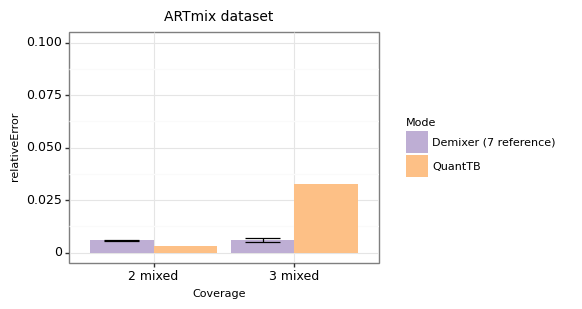

<ggplot: (8728122596602)>

In [40]:
#'#7fc97f',
g=ggplot(rel_error,aes(x='Dataset',y='relativeError', fill = 'Mode'))+ggtitle('ARTmix dataset')+\
    geom_bar(stat = "summary", position="dodge")+\
    geom_errorbar(mapping=aes(x="Dataset", ymin="relativeError-std",ymax="relativeError+std"),stat = 'identity', position=position_dodge(0.9))+\
    theme_bw()+p9.theme(figure_size=(4, 3),axis_text=element_text(color='black'))+scale_fill_manual(values=['#beaed4','#fdc086'])+\
    p9.theme(axis_text_x = element_text(size = 9),axis_text_y = element_text(size = 9),axis_title_y = element_text(size = 8),axis_title_x = element_text(size = 8),strip_text = element_text(size = 8),legend_text = element_text(size = 8),legend_title = element_text(size = 8),plot_title = element_text(size = 10))+labs(x = "Coverage")+\
    p9.theme(legend_box='horizontal', legend_direction='vertical') +  p9.scale_y_continuous(limits=(0, 0.1))
dir="/data/users/CS18D017/LVM_Multistrain/Preprocessing//Pycode/Demixer-main/Demixer-main/Figures/"
#os.chdir(dir)
#ggsave(plot=g, filename=dir+'Figure_4c.svg', dpi=300)
g

In [31]:
def rela_error(x,y):
            x=x+1;
            y=y+1;
            
            z=abs(((x-y))/(x));
            #print(z)
            #print(np.mean(z))
            return np.mean(z);

strain7=pd.read_csv('/data/users/CS18D017/LVM_Multistrain/Preprocessing/Pycode/Demixer-main/artsim_errorbar/strain_7_Prior_SNP_LDA1_0.01.csv')
strain9=pd.read_csv('/data/users/CS18D017/LVM_Multistrain/Preprocessing/Pycode/Demixer-main/artsim_errorbar/denovo/strain_9_Prior_SNP_LDA1_0.01.csv')
strain7=strain7.iloc[0:32,:]
strain9=strain9.iloc[0:32,:]

true_theta7=pd.read_csv('/data/users/CS18D017/LVM_Multistrain/Preprocessing/Pycode/Demixer-main/artsim/7strain_true_theta.csv')
true_theta9=pd.read_csv('/data/users/CS18D017/LVM_Multistrain/Preprocessing/Pycode/Demixer-main/artsim/9strain_true_theta.csv')
list1=[];
list2=[];
#print(strain7[str(1)])

for k in range(0,5):
    list1.append(rela_error(true_theta7[str(k)]/100,strain7[str(k)]))
    list2.append(rela_error(true_theta9[str(k)]/100,strain9[str(k)]))
list1.append(rela_error(true_theta7[str(5)]/100,strain7[str(5)]))
list1.append(rela_error(true_theta7[str(6)]/100,strain7[str(6)]))
list2.append(rela_error(true_theta9[str(5)]/100,strain9[str(6)]))
list2.append(rela_error(true_theta9[str(6)]/100,strain9[str(5)]))

In [33]:
print(rel_error)

         Mode Type  Dataset  relative_error       std
0  ref+denovo  all  2 mixed        0.002256  0.000053
1  ref+denovo  all  3 mixed        0.003225  0.000092
2     all_ref  all  2 mixed        0.000966  0.000065
3     all_ref  all  3 mixed        0.002642  0.000117
4     QuantTB  all  2 mixed        0.000994       NaN
5     QuantTB  all  3 mixed        0.007458       NaN
6     QuantTB  all  2 mixed        0.000994       NaN
7     QuantTB  all  3 mixed        0.007458       NaN


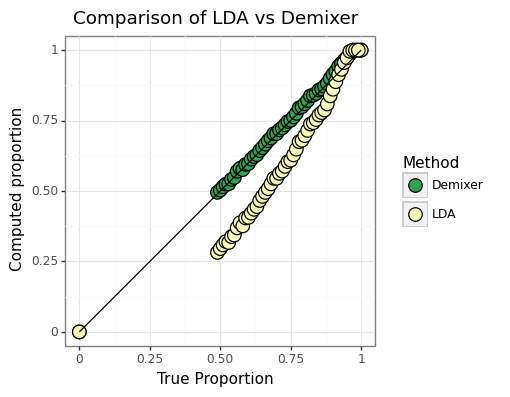

<ggplot: (8745968498782)>

In [15]:
import pandas as pd
strain9_lda=pd.read_csv('../simulation/simulation3/LDA_output.csv')
strain9_Demixer=pd.read_csv('../simulation/simulation3/artsim_errorbar0/denovo/strain_2_Prior_SNP_LDA1_0.01.csv')
strain9_lda_max=strain9_lda['Topic0']
strain9_Demixer_max =strain9_Demixer['1']
true_theta9=pd.read_csv('../simulation/simulation3/artsim/2strain_true_theta.csv')
maxvalues=pd.DataFrame()
maxvalues['LDA']=strain9_lda_max 
maxvalues['Demixer']=strain9_Demixer_max 
maxvalues['LDA']=strain9_lda_max 
#maxvalues['True Proportion']= (true_theta9.min(axis=1)/100)
maxvalues['True Proportion']= true_theta9['0']/100

#maxvalues['True Proportion']= (true_theta9.apply(lambda row: row.nlargest(2).values[-1],axis=1)/100)[0:32]

maxvalues=pd.melt(maxvalues, id_vars =['True Proportion'], value_vars =['Demixer','LDA'])
maxvalues = maxvalues.rename({'value': 'Computed proportion'}, axis=1)
maxvalues = maxvalues.rename({'variable': 'Method'}, axis=1)
#print(maxvalues)
pd.DataFrame(maxvalues).to_csv(r'maxvalues.csv',index=False) 
custom_colors=["#addd8e","#31a354",]

g=ggplot(maxvalues,aes(x='True Proportion',y='Computed proportion'))+\
    scale_fill_manual(values=['#31a354','#f7fcb9'])+\
    ggtitle('Comparison of LDA vs Demixer')+geom_point(aes(fill='Method'),size=5 )+\
    p9.geom_line(p9.aes(x='True Proportion', y='True Proportion'), color='black')+\
    p9.theme_bw()+p9.theme(aspect_ratio=1)+p9.theme(figure_size = (4, 4))
g
#ggsave(plot=g, filename='Figure_5.png', dpi=1000)


In [54]:
r_r=[]
r_d=[]
r_r_d=[]
r_d_d=[]
for j in strain_num:
    for i in range(0,10):
            unpickleFile1 = open('../simulation/simulation3/artsim_errorbar0/denovo/rel_error'+str(j)+'_'+str(i)+'.pkl', 'rb')
            error=pickle.load(unpickleFile1)[0]
            r_r.append(error[4])
            r_d.append(error[5])
            r_r_d.append(error[6])
            r_d_d.append(error[7])
r_error=pd.DataFrame()

/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 4 x 3 in image.
/data/users/CS18D017/miniconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: /data/users/CS18D017/LVM_Multistrain/Preprocessing//Pycode/Demixer-main/Demixer-main/Figures/Figure_4c_sub.svg


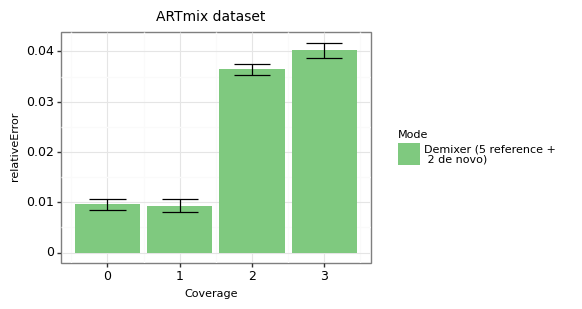

<ggplot: (8728122241317)>

In [55]:
r_error['Type']=['ref+ref','ref+de novo','ref+ref+de novo','ref+de novo+de novo']
r_error['relativeError']=[np.mean(r_r),np.mean(r_d),np.mean(r_r_d),np.mean(r_d_d)]
r_error['std']=[np.std(r_r),np.std(r_d),np.std(r_r_d),np.std(r_d_d)]
r_error['Mode']=['Demixer (5 reference +\n 2 de novo)','Demixer (5 reference +\n 2 de novo)','Demixer (5 reference +\n 2 de novo)','Demixer (5 reference +\n 2 de novo)']
r_error_reset= r_error.reset_index()
g=ggplot(r_error_reset,aes(x='index',y='relativeError',fill='Mode'))+ggtitle('ARTmix dataset')+\
    geom_bar(stat = "summary", position="dodge")+\
    geom_errorbar(mapping=aes(x="index", ymin="relativeError-std",ymax="relativeError+std"),stat = 'identity', position=position_dodge(0.9))+\
    theme_bw()+p9.theme(figure_size=(4, 3),axis_text=element_text(color='black'))+scale_fill_manual(values=['#7fc97f'])+\
    p9.theme(axis_text_x = element_text(size = 9),axis_text_y = element_text(size = 9),axis_title_y = element_text(size = 8),axis_title_x = element_text(size = 8),strip_text = element_text(size = 8),legend_text = element_text(size = 8),legend_title = element_text(size = 8),plot_title = element_text(size = 10))+labs(x = "Coverage")+\
    p9.theme(legend_box='horizontal', legend_direction='vertical') 
dir="/data/users/CS18D017/LVM_Multistrain/Preprocessing//Pycode/Demixer-main/Demixer-main/Figures/"
#os.chdir(dir)
ggsave(plot=g, filename=dir+'Figure_4c_sub.svg', dpi=300)
g

In [34]:
r_error_reset


,index,Type,relativeError,std,Mode
0,0,ref+ref,0.003993,0.000587,Demixer (5 reference +\n 2 de novo)
1,1,ref+de novo,0.093150,0.000463,Demixer (5 reference +\n 2 de novo)
2,2,ref+ref+de novo,0.134115,0.000711,Demixer (5 reference +\n 2 de novo)
3,3,ref+de novo+de novo,0.152169,0.000708,Demixer (5 reference +\n 2 de novo)
